# Predict Student Score

In [1]:
import pandas as pd

In [3]:
df2 = pd.read_csv(r"C:\Users\Admin\Downloads\score.csv")
df2

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df2.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df2.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [8]:
df2.shape

(25, 2)

In [9]:
df2.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualization using plot

<Axes: xlabel='Hours', ylabel='Scores'>

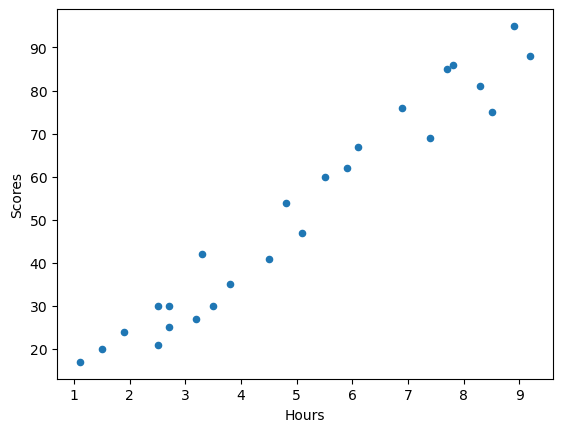

In [16]:
# Scatter plot
df2.plot(x="Hours", y="Scores",kind="scatter")

In [17]:
# putting feature variable to x
x=df2["Hours"]
# print first 5 rows
x.head()


0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [19]:
# putting feature variable to y
y=df2["Scores"]
# print first 5 rows
y.head()


0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

## Splitting datas into Testing and Training datas 

In [22]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.7 , random_state=0000)

In [23]:
print(type(X_train))
print(type(X_test))
print(type(Y_train))
print(type(Y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [24]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(17,)
(17,)
(8,)
(8,)


In [25]:
import numpy as np
#Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
X_train=np.array(X_train)[:, np.newaxis]
X_test=np.array(X_test)[:, np.newaxis]

In [26]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


# Performing Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, Y_train)

LinearRegression()

## Coefficient calculations

In [28]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

2.370815382341881
[9.78856669]


## Predictions

In [29]:
# making predictions on the test sets
Y_pred = lr.predict(X_test)


In [30]:
type(Y_pred)

numpy.ndarray

In [31]:
Y_test.shape 

(8,)

Text(0, 0.5, 'Sales')

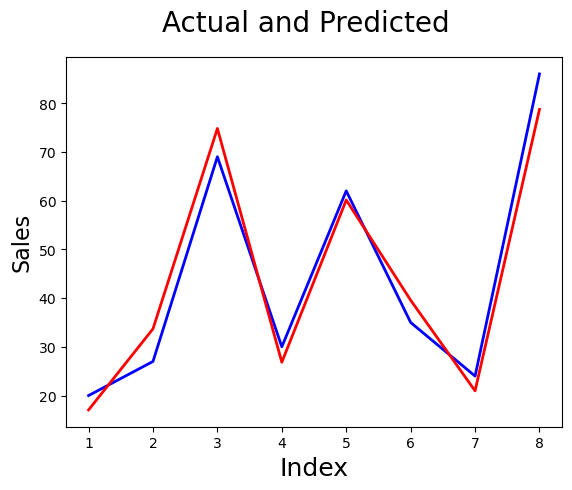

In [35]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range (1,9,1)]                               # generating index 
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,Y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               # Y-label

Text(0, 0.5, 'ytest-ypred')

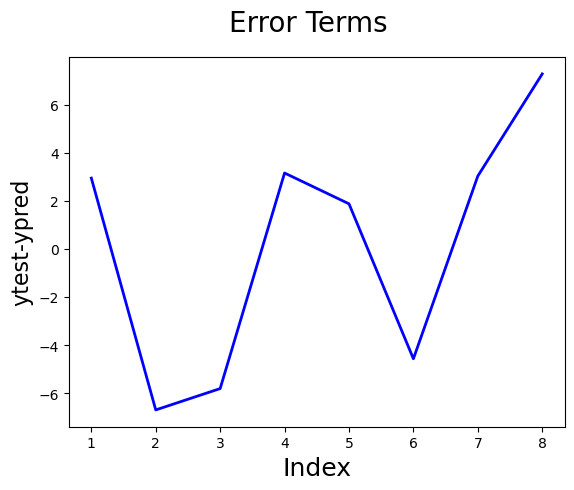

In [37]:
# Error Terms
c = [i for i in range(1,9,1)]
fig = plt.figure()
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)

In [39]:
r_squared = r2_score(Y_test, Y_pred)

In [40]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 22.96509721270043
r_square_value : 0.9568211104435257


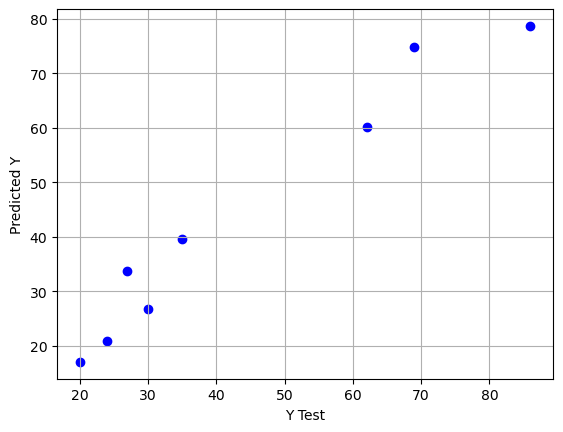

In [41]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
